In [22]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

# ML Introduction Workshop, Session 2
## Overview
* The Perceptron and Multilayer Perceptrons
* Convolutional Neural Networks (CNN)
* Pre-Trained Models
* Recurrent Neural Networks (RNN) and Long Short Term Memory (LSTM)
* Deep Dream 

# The Perceptron and Multilayer Perceptrons
* The perceptron is an artificial neuron which takes a weighted sum of it's inputs and generates an output by passing that through an "activation function"
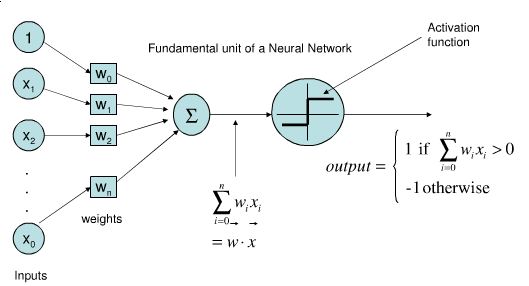
* The perceptron can learn by modifying the weights in such a way to reduce the error at the output, typically done by gradient descent.
* A single perceptron is capable of learning a straight line for classification.
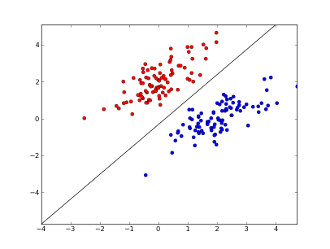

# The MNIST Dataset
* http://yann.lecun.com/exdb/mnist/
* THe MNIST dataset is a set of handwritten digit images which have been preprocessed (size normalized and centered)
* Each digit is not in a typical image format, but a matrix of 8-bit grayscale values.
* MNIST provides 60,000 training images and 10,000 test images.

In [5]:
# Print the digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

idx = 7 # index of the digit I want to look at
digit = X_train[idx]

# make an ascii-art drawing of the digit I'm looking at
str = ""
for i in range(digit.shape[0]):
    for j in range(digit.shape[1]):
        if digit[i][j] == 0:
            str += " "
        elif digit[i][j] < 128:
            str += "."
        else:
            str += "X"
    str += "\n"

print(str)
print("Label: ", y_train[idx])

                            
                            
                            
                            
                            
           ...XXXXXXX.      
         .XXXXXXXXXXXX.     
         XXXXXXXXXXXXX.     
         .XXXXXXXXXXXX.     
         ....    .XXXX.     
                 .XXXX      
                .XXXX.      
              .XXXXXX.      
         ..XXXXXXXX..       
        .XXXXXXXXXX         
        .XXXXXXXXXX.        
         .......XXX.        
                .XX.        
                .XX.        
      ...      .XXX.        
     .XX.    ..XXXX.        
     XXXXXXXXXXXXX.         
     XXXXXXXXXXXX.          
     .XXXXXXXXX.            
      ..XXX..               
                            
                            
                            

Label:  3


# One Hot Encoding
* One hot encoding a simple encoding scheme where only one bit can be non-zero. This results in the bitwidth being equal to the number of unique inputs.

|Binary|Gray code| One hot|
|------|---------|--------|
|   000|      000|00000001|
|   001|      001|00000010|
|   010|      011|00000100|
|   011|      010|00001000|
|   100|      110|00010000|
|   101|      111|00100000|
|   110|      101|01000000|
|   111|      100|10000000|

In [6]:
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_width = X_train.shape[1]
img_height = X_train.shape[2]

# get data to the range [0,1]
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
num_classes = y_train.shape[1]

# one hot encode test data as well
y_test = np_utils.to_categorical(y_test)

print(y_train)
print(y_train.shape)
print(num_classes)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]
(60000, 10)
10


# Log Loss
* Log loss is a classification loss function.
* Log loss quantifies the accuracy of a classifier by penalizing false classifications.
* Log loss is basically equivilent to maximising the accuracy of the classifier.

$- \frac{1}{N} \sum_{i=1}^N \sum_{j=1}^M y_{ij} \log \, p_{ij}$

In [7]:
from sklearn.metrics import log_loss

truth = [0,0,0,0,1]
pred = [0.2,0.2,0.2,0.2,0.2]

print(log_loss(truth, pred))

0.500402423538


# Create a Simple Perceptron Model
* Flatten: Flattens a multi-dimensional input to a single array.
* Dense: A regular densely connected neural network Layer.
    * Softmax: A generalization of the logistic function that "squashes" a vecors to real values in the range [0, 1]:
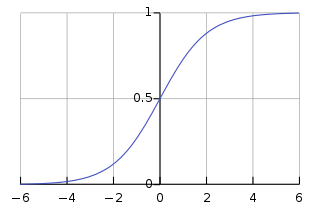
* `categorical_crossentropy` loss function: A measure of how hard it is to tell which of multiple probability distributions an event was drawn from, which the model will try to minimize.
    * This loss function expects the input to be in categorical format (one hot coding with a bit for each category).
* `adam` optimizer: a gradient-based optimization algorithm based on adaptive estimates of lower order moments.
    * https://arxiv.org/abs/1412.6980v8

* We will run our model for 10 "epochs," or training iterations.

In [8]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense

# create model
model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.4683 - acc: 0.8766 - val_loss: 0.3033 - val_acc: 0.9158
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.3040 - acc: 0.9151 - val_loss: 0.2842 - val_acc: 0.9202
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.2833 - acc: 0.9204 - val_loss: 0.2730 - val_acc: 0.92340.920
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.2732 - acc: 0.9238 - val_loss: 0.2670 - val_acc: 0.9254
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.2661 - acc: 0.9260 - val_loss: 0.2660 - val_acc: 0.9272
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.2620 - acc: 0.9274 - val_loss: 0.2671 - val_acc: 0.9264
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.2581 - acc: 0.9286 - val_loss: 0.2645 - val_acc: 0.9266
Epoch 8/10
60000/60000 [==============================] 

# Build a Multilayer Perceptron with One Hidden Layer
* This is the same as our previous network, but with a hidden layer right after the initial flatten layer.
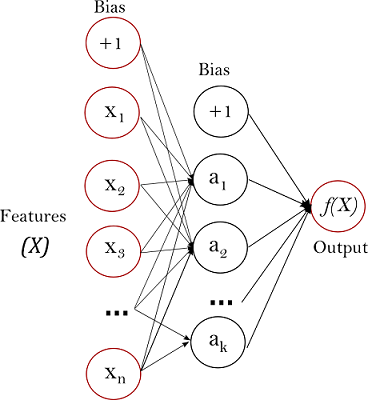
* Dropout layers randomly set a fraction of inputs to 0, helping to prevent overfitting. Try adding in the dropout layers to see if the results can be improved!
* The `relu` activation function is simply a rectifier, or ramp function:
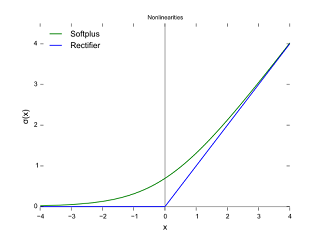

In [9]:
from keras.layers import Dropout

# create model
num_hidden_nodes = 100
model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
#model.add(Dropout(0.9))
model.add(Dense(num_hidden_nodes, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.2680 - acc: 0.9235 - val_loss: 0.1429 - val_acc: 0.9587
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.1230 - acc: 0.9640 - val_loss: 0.1057 - val_acc: 0.9673
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.0870 - acc: 0.9736 - val_loss: 0.0997 - val_acc: 0.9702
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.0657 - acc: 0.9803 - val_loss: 0.0835 - val_acc: 0.9747
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0870 - val_acc: 0.9743
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.0426 - acc: 0.9870 - val_loss: 0.0748 - val_acc: 0.9764
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.0353 - acc: 0.9888 - val_loss: 0.0815 - val_acc: 0.9757
Epoch 8/10
60000/60000 [==============================] - 3s 

# Convolutional Neural Networks
* http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/
* Convolutional neural networks (CNNs) are a variation of multilayer perceptrons that have shift-invariant properties, making them great for image and video systems.
* CNNs can have many hidden layers made up of  convolutional layers, pooling layers, fully connected layers and normalization layers.
    * Convolutional layers perform convolution on an input using a kernel, which is simply a matrix of weights.
    * Pooling layers combine outputs of neuron clusters at one layer into a single neuron in the next layer. Max pooling takes the max from a cluster and provides that as input to the next layer.
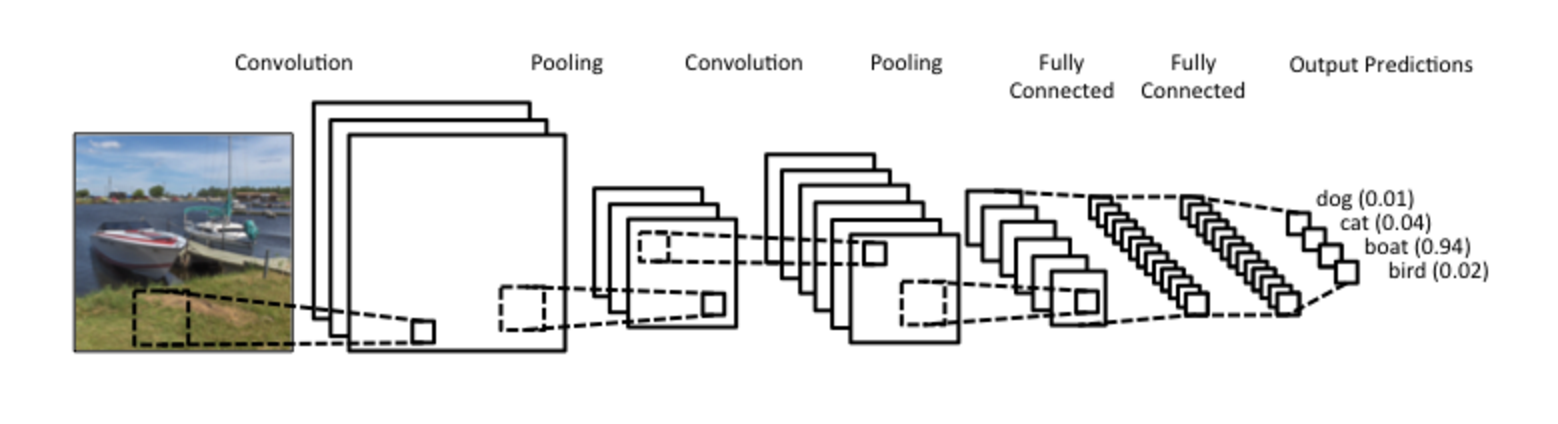

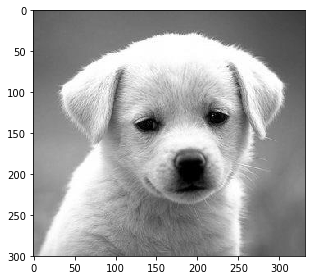

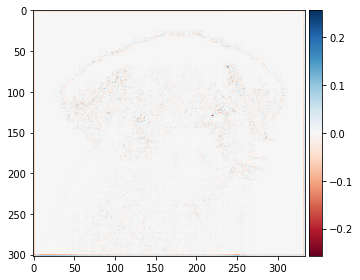

In [79]:
from skimage import io
from skimage import data
from scipy.signal import convolve2d

image = io.imread('dog.jpg', as_grey=True)
io.imshow(image)
io.show()

kernel = [[0.0, 0.1, 0.0],
          [0.1, -0.4, 0.1],
          [0.0, 0.1, 0.0]]

new_image = convolve2d(image, kernel)
io.imshow(new_image)
io.show()

# Maxpool Example

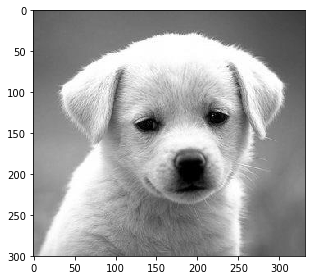

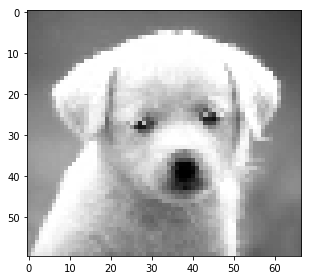

In [49]:
from skimage.measure import block_reduce

image = io.imread('dog.jpg', as_grey=True)
io.imshow(image)
io.show()

new_image = block_reduce(image, block_size=(5, 5), func=np.max)
io.imshow(new_image)
io.show()

# Build a Simple Convolutional Neural Network
### Our CNN will have 5 layers:
1. 2D Convolution using a 3x3 kernel.
2. 2D Max Pooling over a 2x2 pixel range.
3. Flatten
4. Dense layer with 128 units, using a `relu` activation function.
5. Dense layer with an output for each class, using a `softmax` activation function.

In [15]:
from keras.layers import Conv2D, MaxPooling2D

# reshape input data
X_train_reshaped = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], img_width, img_height, 1)

# build model
first_layer_conv_width = 3
first_layer_conv_height = 3
dense_layer_size = 128
model = Sequential()
model.add(Conv2D(32,
    (first_layer_conv_width, first_layer_conv_height),
    input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(dense_layer_size, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s - loss: 0.1560 - acc: 0.9537 - val_loss: 0.0676 - val_acc: 0.9787
Epoch 2/10
60000/60000 [==============================] - 40s - loss: 0.0550 - acc: 0.9832 - val_loss: 0.0499 - val_acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 40s - loss: 0.0345 - acc: 0.9892 - val_loss: 0.0479 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 40s - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0434 - val_acc: 0.9855
Epoch 5/10
60000/60000 [==============================] - 42s - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0424 - val_acc: 0.9873
Epoch 6/10
60000/60000 [==============================] - 42s - loss: 0.0123 - acc: 0.9963 - val_loss: 0.0441 - val_acc: 0.9866
Epoch 7/10
60000/60000 [==============================] - 42s - loss: 0.0093 - acc: 0.9969 - val_loss: 0.0521 - val_acc: 0.9852
Epoch 8/10
60000/60000 [==============================

# Pre-Trained Models
* There are many pre-trained models available. we'll cover 3 popular ones:
    * VGG16
    * ResnNet50
    * InceptionV3
* We'll be using weights based on training on the imagenet dataset.
* The image we'll be classifying is shown below, but feel free to try out others!

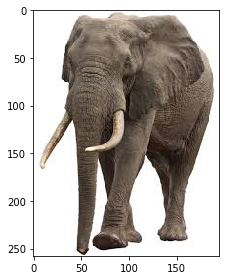

In [50]:
image = io.imread('elephant.jpg')
io.imshow(image)
io.show()

# Pre-Trained Models: VGG16
* https://keras.io/applications/#vgg16
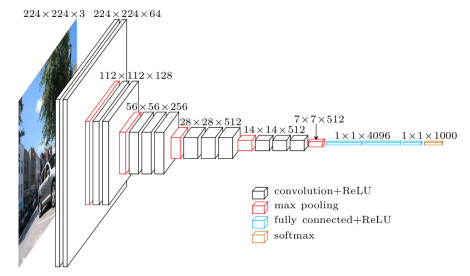

In [18]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

model = VGG16(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
model.summary()
preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

553451520/553467096 [============================>.] - ETA: 0s_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (M

# Pre-trained Models: ResNet50
* https://keras.io/applications/#resnet50

In [12]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
model.summary()
preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
___________________________________________________________________________________________

Predicted: [('n01871265', 'tusker', 0.41353586), ('n02504013', 'Indian_elephant', 0.40011993), ('n02504458', 'African_elephant', 0.186214)]


# Pre-Trained Models: InceptionV3
* https://keras.io/applications/#inceptionv3
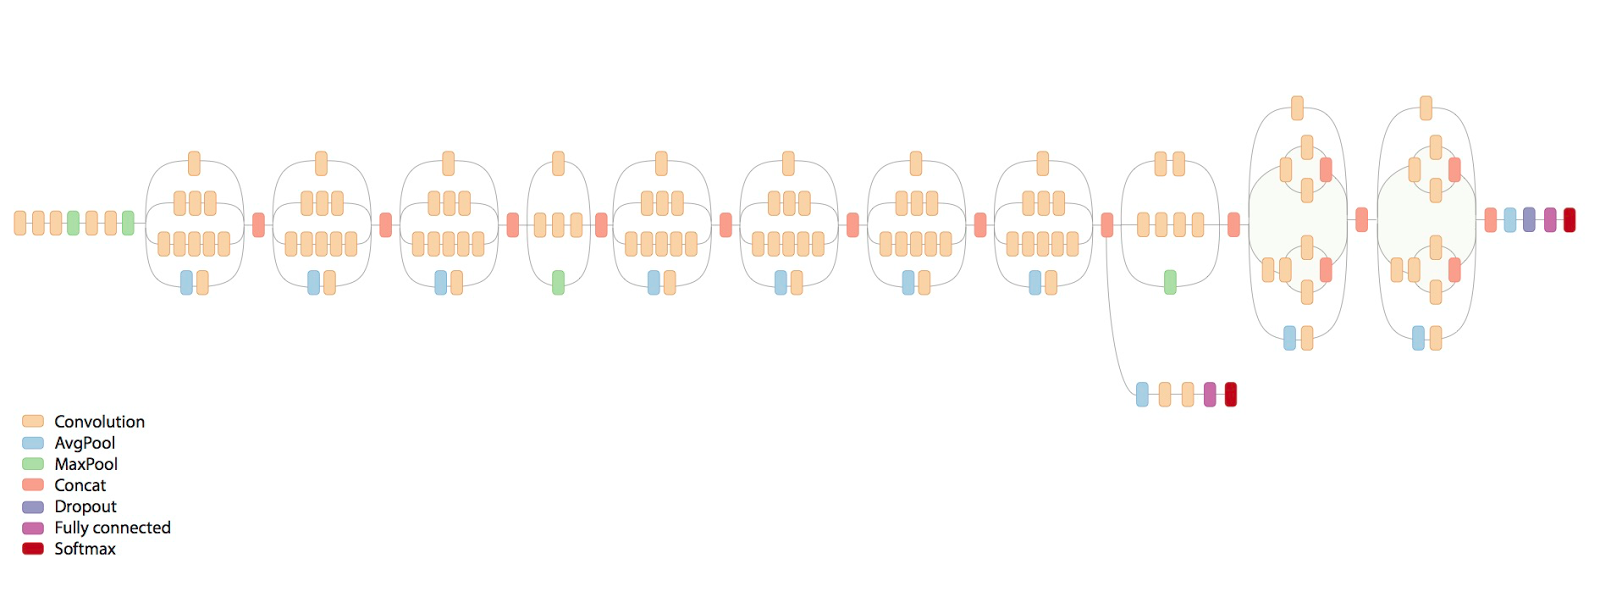

In [13]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

model = InceptionV3(weights='imagenet')

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
model.summary()
preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_2 (InputLayer)             (None, 299, 299, 3)   0                                            
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 149, 149, 32)  864         input_2[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 149, 149, 32)  96          conv2d_2[0][0]                   
____________________________________________________________________________________________________
activation_50 (Activation)       (None, 149, 149, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

Predicted: [('n01871265', 'tusker', 0.92372692), ('n02504013', 'Indian_elephant', 0.032992061), ('n02504458', 'African_elephant', 0.022370933)]


# Recurrent Neural Networks (RNN)
* RNNs differ from what we've seen so far, by keeping a memory of the past outputs.
* They are powerful tools for handwriting recognition and speech recognition, where the preceding sequence of letters or phonemes changes the likelihood of the next events.
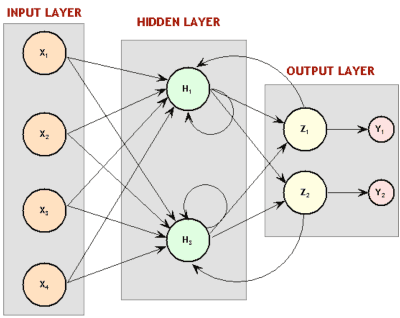

# Long Short Term Memory (LSTM)
* LSTM gives a RNN the ability to remember things over a long period of time that are important, and forget unimportant things.
* They are powerful for data that has long and short times between significant events.
* The dataset we'll be using for these examples is a list of the number of airline passengers per month (in thousands) from 1949 to 1960.
* This will be a time-series regression example, due to the time-series nature of the data. The model will attempt to predict future data. We'll be following this example: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
* A fun read: http://karpathy.github.io/2015/05/21/rnn-effectiveness/
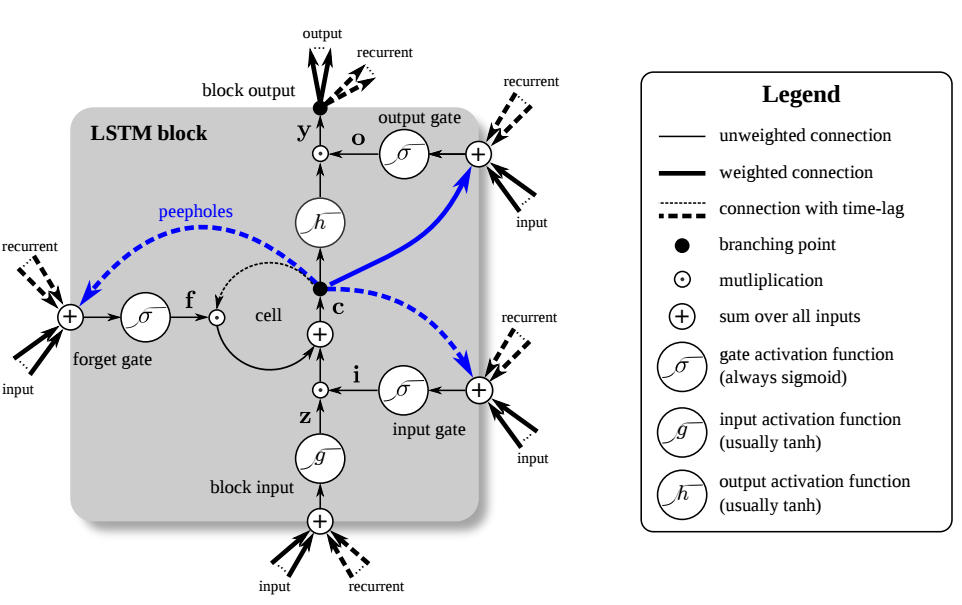

Raw data:
[[ 112.]
 [ 118.]
 [ 132.]
 [ 129.]
 [ 121.]]
Normalized data:
[[ 0.01544401]
 [ 0.02702703]
 [ 0.05405405]
 [ 0.04826255]
 [ 0.03281853]]


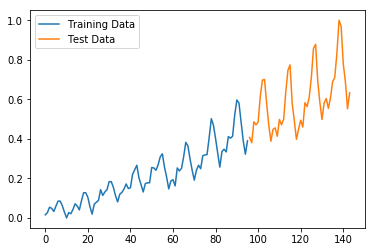

In [100]:
# load the dataset
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

# Print first five entries
print("Raw data:")
print(dataset[:5])

from sklearn.preprocessing import MinMaxScaler

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("Normalized data:")
print(train[:5])

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

import matplotlib.pyplot as plt

# plot baseline and predictions
plt.plot(train)
plt.plot(range(train_size,train_size+test_size), test)
plt.legend(['Training Data', 'Test Data'])
plt.show()


# Create a Simple LSTM
* Our network will have a single input node, a 4 node LSTM layer, and a single fully-connected node to generate the output.
* LSTM expects input data in the form `[samples, time steps, features]`. Our data is in the form `[samples, features]` and we are framing the problem as one time step for each sample so we must reshape the dataset.
* We'll look one sample in the past to predict the future, but go ahead and try looking back further by modifying the `look_back` parameter! For example, changing it to three would use `X1=t`, `X2=t-1`, and `X3=t-2` to predict `Y=t+1`.
* The `batch_size` is the number of inputs per gradient update.
* `inverse_transform` brings the data back to the same form as the original data, which is thousands per month in out example.

Dataset:
(94, 1)
[[ 0.01544401]
 [ 0.02702703]
 [ 0.05405405]
 [ 0.04826255]
 [ 0.03281853]]
[ 0.02702703  0.05405405  0.04826255  0.03281853  0.05984557]
Reshaped dataset:
(94, 1, 1)
Epoch 1/100
1s - loss: 0.0370
Epoch 2/100
0s - loss: 0.0162
Epoch 3/100
0s - loss: 0.0130
Epoch 4/100
0s - loss: 0.0118
Epoch 5/100
0s - loss: 0.0108
Epoch 6/100
0s - loss: 0.0098
Epoch 7/100
0s - loss: 0.0087
Epoch 8/100
0s - loss: 0.0078
Epoch 9/100
0s - loss: 0.0069
Epoch 10/100
0s - loss: 0.0061
Epoch 11/100
0s - loss: 0.0054
Epoch 12/100
0s - loss: 0.0046
Epoch 13/100
0s - loss: 0.0040
Epoch 14/100
0s - loss: 0.0035
Epoch 15/100
0s - loss: 0.0031
Epoch 16/100
0s - loss: 0.0028
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0023
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - loss: 0.0020
Epoch 27/100
0s - l

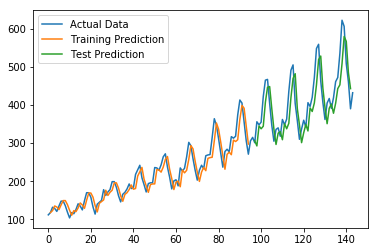

In [101]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("Dataset:")
print(trainX.shape)
print(trainX[:5])
print(trainY[:5])

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print("Reshaped dataset:")
print(trainX.shape)

from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math

###################################
# Create and fit the LSTM network #
###################################
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual Data', 'Training Prediction', 'Test Prediction'])
plt.show()

# Simple LSTM with Time Steps
* In our previous example, when changing the `look_back` parameter to `>1` we were treating each previous sample as a different feature. We can modify the way we reshape the input to treat the samples together as one feature.

Dataset:
(92, 3)
[[ 0.01544401  0.02702703  0.05405405]
 [ 0.02702703  0.05405405  0.04826255]
 [ 0.05405405  0.04826255  0.03281853]
 [ 0.04826255  0.03281853  0.05984557]
 [ 0.03281853  0.05984557  0.08494207]]
[ 0.04826255  0.03281853  0.05984557  0.08494207  0.08494207]
Reshaped dataset:
(92, 3, 1)
Epoch 1/100
2s - loss: 0.0119
Epoch 2/100
0s - loss: 0.0059
Epoch 3/100
0s - loss: 0.0050
Epoch 4/100
0s - loss: 0.0044
Epoch 5/100
0s - loss: 0.0040
Epoch 6/100
0s - loss: 0.0039
Epoch 7/100
0s - loss: 0.0036
Epoch 8/100
0s - loss: 0.0036
Epoch 9/100
0s - loss: 0.0035
Epoch 10/100
0s - loss: 0.0035
Epoch 11/100
0s - loss: 0.0034
Epoch 12/100
0s - loss: 0.0033
Epoch 13/100
0s - loss: 0.0034
Epoch 14/100
0s - loss: 0.0035
Epoch 15/100
0s - loss: 0.0034
Epoch 16/100
0s - loss: 0.0033
Epoch 17/100
0s - loss: 0.0033
Epoch 18/100
0s - loss: 0.0033
Epoch 19/100
0s - loss: 0.0035
Epoch 20/100
0s - loss: 0.0032
Epoch 21/100
0s - loss: 0.0034
Epoch 22/100
0s - loss: 0.0033
Epoch 23/100
0s - loss:

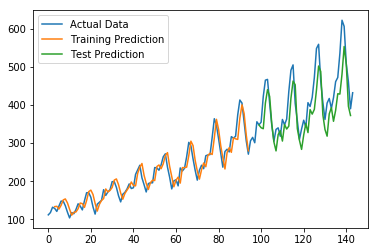

In [102]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("Dataset:")
print(trainX.shape)
print(trainX[:5])
print(trainY[:5])

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("Reshaped dataset:")
print(trainX.shape)

from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math

###################################
# Create and fit the LSTM network #
###################################
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual Data', 'Training Prediction', 'Test Prediction'])
plt.show()

# LSTM with Memory Between Batches
* LSTM networks maintain state across long sequences.  Normally the state is reset between training batches, but we can make the network 'stateful' by not clearing the state.

Dataset:
(92, 3)
[[ 0.01544401  0.02702703  0.05405405]
 [ 0.02702703  0.05405405  0.04826255]
 [ 0.05405405  0.04826255  0.03281853]
 [ 0.04826255  0.03281853  0.05984557]
 [ 0.03281853  0.05984557  0.08494207]]
[ 0.04826255  0.03281853  0.05984557  0.08494207  0.08494207]
Reshaped dataset:
(92, 3, 1)
Epoch 1/1
1s - loss: 0.0196
Epoch 1/1
0s - loss: 0.0169
Epoch 1/1
0s - loss: 0.0150
Epoch 1/1
0s - loss: 0.0123
Epoch 1/1
0s - loss: 0.0096
Epoch 1/1
0s - loss: 0.0073
Epoch 1/1
0s - loss: 0.0060
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0

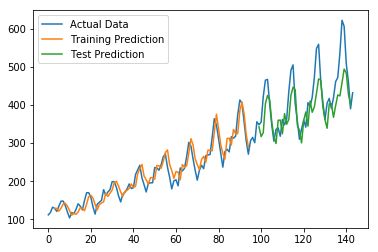

In [94]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("Dataset:")
print(trainX.shape)
print(trainX[:5])
print(trainY[:5])

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("Reshaped dataset:")
print(trainX.shape)

from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math

###################################
# Create and fit the LSTM network #
###################################
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
iterations = 100
for i in range(iterations):
    print("iteration {}/{}".format(i, iterations))
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual Data', 'Training Prediction', 'Test Prediction'])
plt.show()

# Stacked LSTMs with Memory Between Batches
* A big benefit of LSTMs is that they can be trained when stacked into deep network achitectures.
* When stacking LSTMs, the prior layer must return the sequence to the next LSTM layer by setting `return_sequences` to `True`.

Dataset:
(92, 3)
[[ 0.01544401  0.02702703  0.05405405]
 [ 0.02702703  0.05405405  0.04826255]
 [ 0.05405405  0.04826255  0.03281853]
 [ 0.04826255  0.03281853  0.05984557]
 [ 0.03281853  0.05984557  0.08494207]]
[ 0.04826255  0.03281853  0.05984557  0.08494207  0.08494207]
Reshaped dataset:
(92, 3, 1)
iteration 0/100
Epoch 1/1
2s - loss: 0.0058
iteration 1/100
Epoch 1/1
0s - loss: 0.0142
iteration 2/100
Epoch 1/1
0s - loss: 0.0108
iteration 3/100
Epoch 1/1
0s - loss: 0.0080
iteration 4/100
Epoch 1/1
0s - loss: 0.0065
iteration 5/100
Epoch 1/1
0s - loss: 0.0059
iteration 6/100
Epoch 1/1
0s - loss: 0.0057
iteration 7/100
Epoch 1/1
0s - loss: 0.0056
iteration 8/100
Epoch 1/1
0s - loss: 0.0056
iteration 9/100
Epoch 1/1
0s - loss: 0.0055
iteration 10/100
Epoch 1/1
0s - loss: 0.0055
iteration 11/100
Epoch 1/1
0s - loss: 0.0055
iteration 12/100
Epoch 1/1
0s - loss: 0.0055
iteration 13/100
Epoch 1/1
0s - loss: 0.0055
iteration 14/100
Epoch 1/1
0s - loss: 0.0055
iteration 15/100
Epoch 1/1
0s -

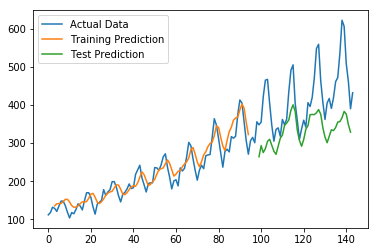

In [103]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print("Dataset:")
print(trainX.shape)
print(trainX[:5])
print(trainY[:5])

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print("Reshaped dataset:")
print(trainX.shape)

from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import math

###################################
# Create and fit the LSTM network #
###################################
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
iterations = 100
for i in range(iterations):
    print("iteration {}/{}".format(i, iterations))
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Actual Data', 'Training Prediction', 'Test Prediction'])
plt.show()

# Train an LSTM Network To Generate Text
* In these examples we'll train an LSTM network to generate text after learning Lewis Carroll's "Alice's Adventures in Wonderland"
* The training can take a while! Be careful with the number of epochs!
* We'll do this in 3 steps:
    1. Preprocess the text
    2. Train the LSTM network
    3. Generate text with our model!

In [104]:
import pickle

filename = "book.txt"
raw_text = open(filename, "r", encoding="utf8").read()
raw_text = raw_text.lower()

# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i,c) for (c,i) in char_to_int.items())

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX, dataY = [], []
for i in range(len(raw_text) - seq_length):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)

# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(len(chars))
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

print(len(char_to_int))
print(len(int_to_char))
print(X.shape)  # x is array of 100 vals for every sequence
print(y.shape)  # y is a single val but one-hot encoded for every sequence

# save the preprocessed text
cached_data = {
    'char_to_int': char_to_int,
    'int_to_char': int_to_char,
    'X': X,
    'y': y
}
with open('book.pkl', 'wb') as output:
    pickle.dump(cached_data, output)
print("Wrote cache to {}".format(output.name))

60
60
(163094, 100, 1)
(163094, 59)
Wrote cache to book.pkl


In [105]:
with open('book.pkl', 'rb') as input:
    cached_data = pickle.load(input)
    char_to_int = cached_data['char_to_int']
    int_to_char = cached_data['int_to_char']
    X = cached_data['X']
    y = cached_data['y']
    print("Read cache file {}".format(input.name))

# define the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(X, y, epochs=2, batch_size=128)
model.save("book-lstm.h5")

Read cache file book.pkl
Epoch 1/2
163094/163094 [==============================] - 1265s - loss: 2.9967  
Epoch 2/2
163094/163094 [==============================] - 1298s - loss: 2.7726  


In [109]:
from keras.models import load_model
import sys

with open('book.pkl', 'rb') as input:
    cached_data = pickle.load(input)
    char_to_int = cached_data['char_to_int']
    int_to_char = cached_data['int_to_char']
    X = cached_data['X']
    y = cached_data['y']
    print("Read cache file {}".format(input.name))

start = np.random.randint(0, len(X)-1)
pattern = [int(x) for x in X[start] * len(char_to_int)]

model = load_model('book-lstm.h5')

print("Starting with: \"", ''.join([int_to_char[value] for value in pattern]), "\"")

# generate characters
for i in range(1000):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(len(int_to_char))
    prediction = model.predict(x, verbose=0)
    index = np.random.choice(range(len(prediction[0])), p = prediction[0]  / sum(prediction[0] ))
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    sys.stdout.flush()
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

Read cache file book.pkl
Starting with: " ore,
    and have grown most uncommonly fat;
   yet you turned a back-somersault in at the door--
   "
   ‘ik.doft snet,isd outuh wte wouh  inee  ayvm setn  ‘ies oaltth real,aout
jiu  
   **ridss 
 c  7  ‘aur thaw a si drep,yeo aloew 
 tow hfrs ietneg ir pie poo
teeag,il fi sal nock qa bae qalnhndwnn woe d’rdnuigcrld’o cuman ’ht cwucphi
cni aori shtti  ‘iu vpua srle tueswtee th tfele
fnl ouuha.yh mny’,’ anlh cnl ooc oegks
aotn-y gabem too 
afn reeat moteee fsnfd yhaltu mo ta lemtim whetd
aoo thvtlygn tie het, wh aunnkck te!auc rhraest owdn,toipstti-’

‘uhi kon mhsl,b tfnkl?d wler thsld thdf a
lercgtgne ’osn eo thesl   l im’ whucls vea wooes wuo hog yhs  ‘race tre no.er ia ded, ler
shse mhgd a drmnhde
sfl ’ss
socr
hiry ohid ea
saoitu wothlierll pet uab hie sane thak shc’ nhe,ff teit thkh soyp o(ctkn nnr  flrc.yt f aawddrre cantr
snre soruenl dfmy, saih h 3et.’eet iutede dadr:y pemedc’p,  te
se 1rae ladss sai csyut,o blsneedi, uiaft wie aorlss of

# Deep Dream

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_474 (Conv2D)              (None, None, None, 32 864         input_8[0][0]                    
____________________________________________________________________________________________________
batch_normalization_471 (BatchNo (None, None, None, 32 96          conv2d_474[0][0]                 
____________________________________________________________________________________________________
activation_520 (Activation)      (None, None, None, 32 0           batch_normalization_471[0][0]    
___________________________________________________________________________________________

____________________________________________________________________________________________________
activation_563 (Activation)      (None, None, None, 19 0           batch_normalization_514[0][0]    
____________________________________________________________________________________________________
activation_568 (Activation)      (None, None, None, 19 0           batch_normalization_519[0][0]    
____________________________________________________________________________________________________
activation_569 (Activation)      (None, None, None, 19 0           batch_normalization_520[0][0]    
____________________________________________________________________________________________________
mixed5 (Concatenate)             (None, None, None, 76 0           activation_560[0][0]             
                                                                   activation_563[0][0]             
                                                                   activation_568[0][0]    

..Loss value at 0 : 0.0296231
..Loss value at 1 : 0.0339546
..Loss value at 2 : 0.0422725
..Loss value at 3 : 0.0503814
..Loss value at 4 : 0.0589221
..Loss value at 5 : 0.0661805
..Loss value at 6 : 0.0720436
..Loss value at 7 : 0.0781134
..Loss value at 8 : 0.0883571
..Loss value at 9 : 0.0939079
..Loss value at 10 : 0.103075
..Loss value at 11 : 0.109728
..Loss value at 12 : 0.114183
..Loss value at 13 : 0.120922
..Loss value at 14 : 0.127658
..Loss value at 15 : 0.13552
..Loss value at 16 : 0.139844
..Loss value at 17 : 0.144464
..Loss value at 18 : 0.153243
..Loss value at 19 : 0.160949


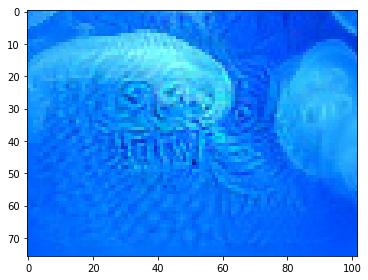

Processing image shape (107, 142)
..Loss value at 0 : 0.0593907
..Loss value at 1 : 0.0786227
..Loss value at 2 : 0.092779
..Loss value at 3 : 0.104682
..Loss value at 4 : 0.116221
..Loss value at 5 : 0.129353
..Loss value at 6 : 0.138775
..Loss value at 7 : 0.150737
..Loss value at 8 : 0.160298
..Loss value at 9 : 0.16969
..Loss value at 10 : 0.181237
..Loss value at 11 : 0.192638
..Loss value at 12 : 0.203668
..Loss value at 13 : 0.215855
..Loss value at 14 : 0.228079
..Loss value at 15 : 0.237037
..Loss value at 16 : 0.250031
..Loss value at 17 : 0.262992
..Loss value at 18 : 0.274757
..Loss value at 19 : 0.289136


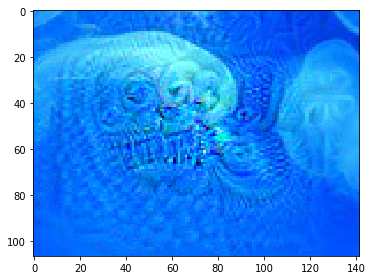

Processing image shape (150, 200)
..Loss value at 0 : 0.0744592
..Loss value at 1 : 0.0966791
..Loss value at 2 : 0.113294
..Loss value at 3 : 0.128185
..Loss value at 4 : 0.141784
..Loss value at 5 : 0.155477
..Loss value at 6 : 0.168864
..Loss value at 7 : 0.179899
..Loss value at 8 : 0.193123
..Loss value at 9 : 0.205256
..Loss value at 10 : 0.216981
..Loss value at 11 : 0.228701
..Loss value at 12 : 0.241834
..Loss value at 13 : 0.256035
..Loss value at 14 : 0.269923
..Loss value at 15 : 0.28414
..Loss value at 16 : 0.30061
..Loss value at 17 : 0.315684
..Loss value at 18 : 0.330414
..Loss value at 19 : 0.348027


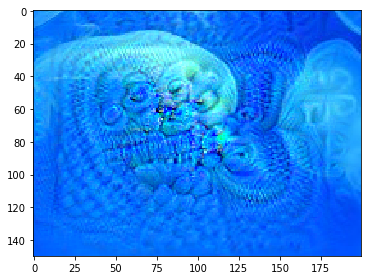

In [116]:
from keras import backend as K
from keras.applications import inception_v3
from keras.preprocessing.image import load_img, img_to_array
import scipy
from skimage import io

base_image_path = "Aurelia-aurita-3.jpg"

# Playing with these hyperparameters will also allow you to achieve new effects
step = 0.01  # Gradient ascent step size
num_octave = 3  # Number of scales at which to run gradient ascent
octave_scale = 1.4  # Size ratio between scales
iterations = 20  # Number of ascent steps per scale
max_loss = 10.

settings = {
    'features': {
        #'mixed1':1.0,
        'mixed2': 0.2,
        #'mixed3': 0.5,
        #'mixed4': 2.,
        #'mixed8': 1.5,
    },
}


def preprocess_image(image_path):
    # Util function to open, resize and format pictures
    # into appropriate tensors.
    img = load_img(image_path)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = inception_v3.preprocess_input(img)
    return img


def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

K.set_learning_phase(0)

# Build the InceptionV3 network with our placeholder.
# The model will be loaded with pre-trained ImageNet weights.
model = inception_v3.InceptionV3(weights='imagenet',
                                 include_top=False)
dream = model.input
model.summary()
print('Model loaded.')

# Get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

# Define the loss.
loss = K.variable(0.)
for layer_name in settings['features']:
    # Add the L2 norm of the features of a layer to the loss.
    assert layer_name in layer_dict.keys(), 'Layer ' + layer_name + ' not found in model.'
    coeff = settings['features'][layer_name]
    x = layer_dict[layer_name].output
    # We avoid border artifacts by only involving non-border pixels in the loss.
    scaling = K.prod(K.cast(K.shape(x), 'float32'))

    loss += coeff * K.sum(K.square(x[:, 2: -2, 2: -2, :])) / scaling

# Compute the gradients of the dream wrt the loss.
grads = K.gradients(loss, dream)[0]
# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)

# Set up function to retrieve the value
# of the loss and gradients given an input image.
outputs = [loss, grads]
fetch_loss_and_grads = K.function([dream], outputs)


def eval_loss_and_grads(x):
    outs = fetch_loss_and_grads([x])
    loss_value = outs[0]
    grad_values = outs[1]
    return loss_value, grad_values


def resize_img(img, size):
    img = np.copy(img)

    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = eval_loss_and_grads(x)
        if max_loss is not None and loss_value > max_loss:
            break
        print('..Loss value at', i, ':', loss_value)
        x += step * grad_values
    return x


def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)


"""Process:
- Load the original image.
- Define a number of processing scales (i.e. image shapes),
    from smallest to largest.
- Resize the original image to the smallest scale.
- For every scale, starting with the smallest (i.e. current one):
    - Run gradient ascent
    - Upscale image to the next scale
    - Reinject the detail that was lost at upscaling time
- Stop when we are back to the original size.
To obtain the detail lost during upscaling, we simply
take the original image, shrink it down, upscale it,
and compare the result to the (resized) original image.
"""

img = preprocess_image(base_image_path)

original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

for i, shape in enumerate(successive_shapes):
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=iterations,
                          step=step,
                          max_loss=max_loss)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img

    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)

    pil_img = deprocess_image(np.copy(img))
    io.imshow(pil_img)
    io.show()